In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
# Load the dataset
diabetes_dataset = pd.read_csv("../datasets/diabetes.csv")

In [3]:
# Display basic info
display(diabetes_dataset.head())
print("Dataset Shape:", diabetes_dataset.shape)
print("\nDataset Description:\n", diabetes_dataset.describe())
print("\nClass Distribution:\n", diabetes_dataset['Outcome'].value_counts())
print("\nGrouped Mean by Outcome:\n", diabetes_dataset.groupby('Outcome').mean())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset Shape: (768, 9)

Dataset Description:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232   

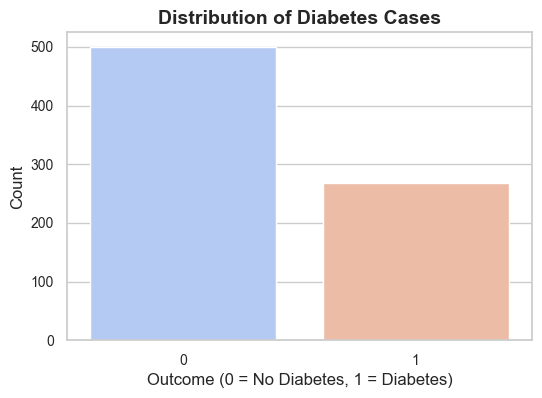

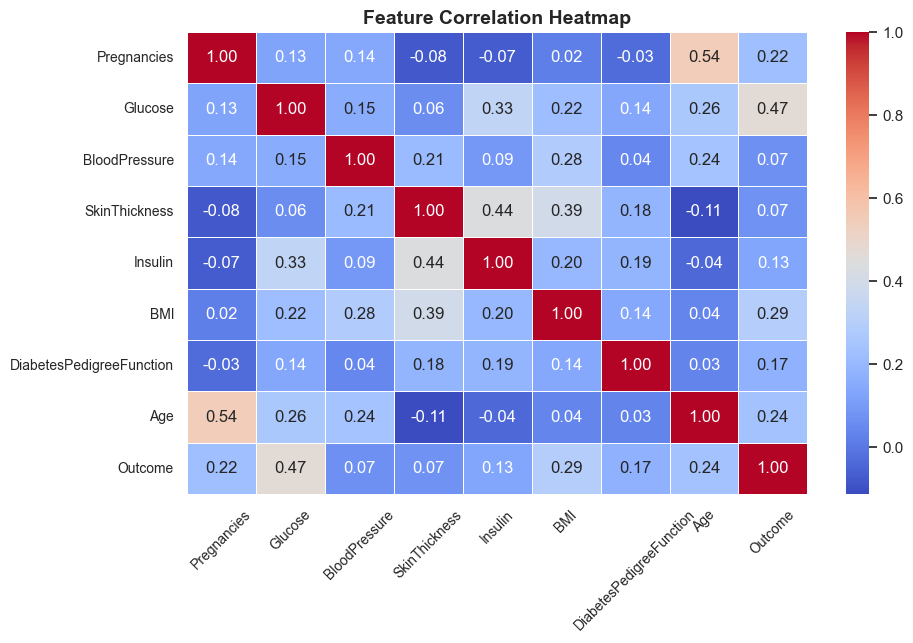

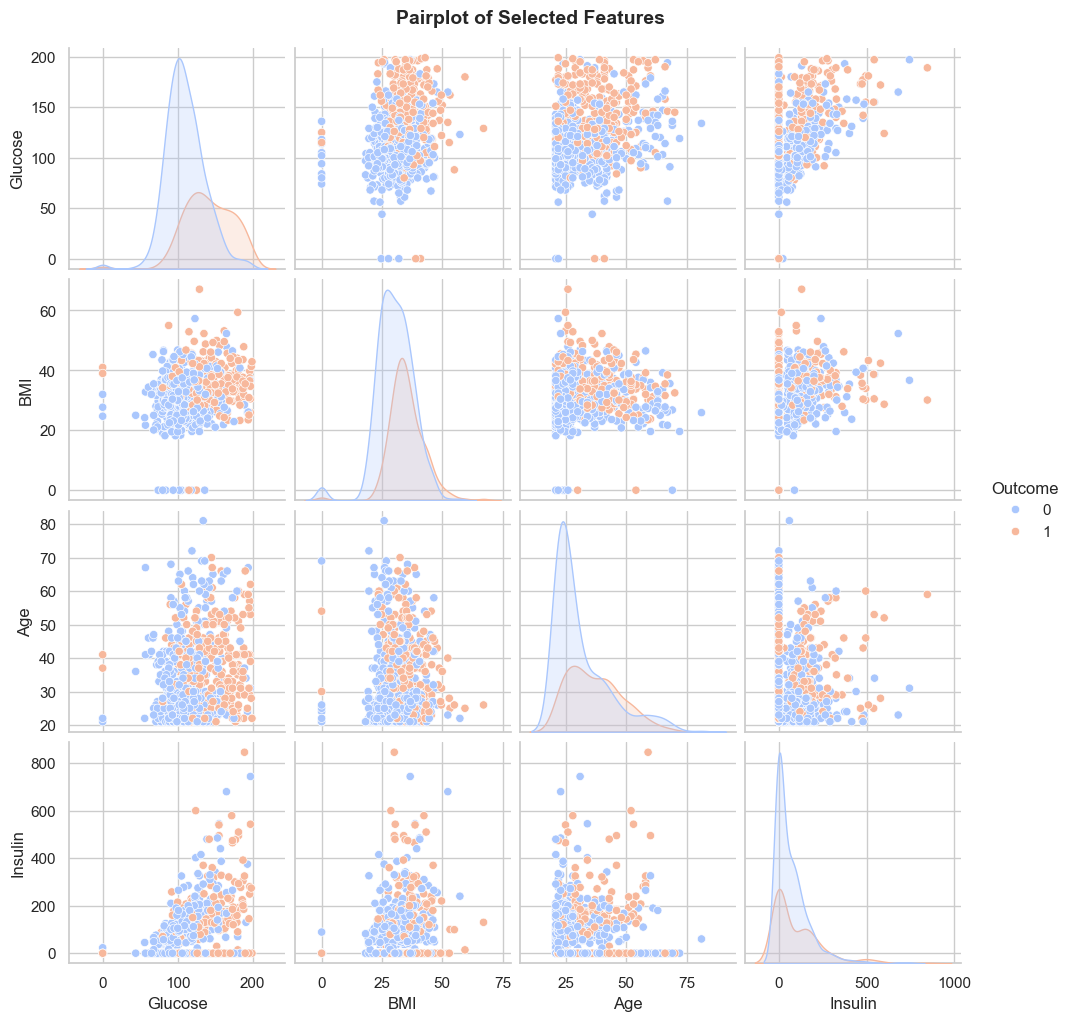

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
sns.set_theme(style="whitegrid")

# Visualization 1: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_dataset, hue='Outcome', palette='coolwarm', legend=False)
plt.title("Distribution of Diabetes Cases", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Visualization 2: Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Visualization 3: Pairplot (Selected Features)
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin']
sns.pairplot(diabetes_dataset, hue='Outcome', diag_kind='kde', vars=selected_features, palette='coolwarm')
plt.suptitle("Pairplot of Selected Features", fontsize=14, fontweight='bold', y=1.02)
plt.show()


In [5]:
# Prepare features and target
X = diabetes_dataset.drop(columns=['Outcome'], axis=1)
y = diabetes_dataset['Outcome']


In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [9]:
# Make predictions
y_pred = model.predict(X_test)


In [10]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.7597
Precision: 0.6667
Recall: 0.6545
F1 Score: 0.6606

Confusion Matrix:
 [[81 18]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



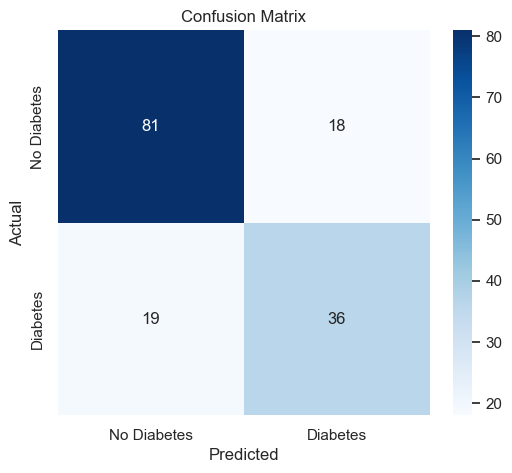

In [11]:
# Visualization 4: Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Save trained model
filename = 'diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))
print("\nModel saved successfully as 'diabetes_model.sav'")



Model saved successfully as 'diabetes_model.sav'
